### Sample notebook for Client Side Processing.

Create results folder if not present. This will be the path of our local collections.

In [1]:
import os
if not os.path.exists('./results'):
    os.mkdir('results')

Connect to openEO Platform to download some sample data

In [ ]:
import openeo
# conn = openeo.connect('openeo.cloud').authenticate_oidc('egi')
conn = openeo.connect('openeo.vito.be').authenticate_oidc()

netCDF samples:

In [3]:
temporal_extent = ['2017-06-01','2017-07-01']
spatial_extent = {
          'west': 11.08,
          'east': 11.16,
          'south': 46.05,
          'north': 46.07
        }
S2_collection = 'SENTINEL2_L2A'
bands = ['B02','B03','B04']
S2_data = conn.load_collection(S2_collection,
                               temporal_extent=temporal_extent,
                               bands=bands,
                               spatial_extent=spatial_extent)
S2_data.download('results/S2_L2A_data.nc')

In [3]:
temporal_extent = ['2017-06-01','2017-07-01']
spatial_extent = {
          'west': 11.08,
          'east': 11.16,
          'south': 46.05,
          'north': 46.07
        }
S1_collection = 'SENTINEL1_GRD'
bands = ['VV','VH']
S1_data = conn.load_collection(S1_collection,
                               temporal_extent=temporal_extent,
                               bands=bands,
                               spatial_extent=spatial_extent)
S1_data.download('results/S1_GRD_data.nc')

VV VH ratio sample result used later for comparison:

In [4]:
S1_data = S1_data.reduce_dimension(dimension='t',reducer='mean')
VV = S1_data.band('VV')
VH = S1_data.band('VH')

ratio = (VV / VH).log10().download('S1_GRD_ratio_VITO.nc')

geoTIFF samples with single band:

In [5]:
temporal_extent = ['2017-06-01','2017-07-01']
spatial_extent = {
          'west': 11.08,
          'east': 11.16,
          'south': 46.05,
          'north': 46.07
        }
S2_collection = 'SENTINEL2_L2A'
bands = ['B02','B03','B04']
S2_data = conn.load_collection(S2_collection,
                               temporal_extent=temporal_extent,
                               bands=bands,
                               spatial_extent=spatial_extent)
S2_data.max_time().download('results/S2_L2A_data.tiff')

geoTIFF samples with multiple bands:
I created a PR in rioxarray, the new functionality is implemented in the latest version of it https://github.com/corteva/rioxarray/pull/592

Should we also consider multiple geoTIFFs, one for each timestamp, as a single collection? I would not, better use netCDF for it.

### Start with the local collections discovery

In [3]:
from openeo.local import LocalConnection
local_conn = LocalConnection('./results/')
local_conn.list_collections()

[{'stac_version': '1.0.0-rc.2',
  'type': 'Collection',
  'id': 'results/S1_GRD_data.nc',
  'title': 'results/S1_GRD_data.nc',
  'description': '',
  'license': '',
  'providers': [{'name': 'openEO platform', 'roles': ['producer'], 'url': ''}],
  'links': '',
  'extent': {'spatial': {'bbox': [[11.079252577441025,
      46.05000342740738,
      11.160823305139893,
      46.070000870424366]]},
   'temporal': {'interval': [['2017-06-03T00:00:00.000000000',
      '2017-06-29T00:00:00.000000000']]}},
  'cube:dimensions': {'t': {'type': 'temporal',
    'extent': ['2017-06-03T00:00:00.000000000',
     '2017-06-29T00:00:00.000000000']},
   'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [660855.0, 667105.0],
    'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], AUTHORITY["EPSG","6326"]], PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], UNIT["degree", 0.017453292519943295], AXIS["Geodetic longitude", EAST], AXIS["Geodetic latitude", NORTH], AUTHORITY["EPSG","4326"]], PROJECTION["Transverse_Mercator", AUTHORITY["EPSG","9807"]], PARAMETER["central_meridian", 9.0], PARAMETER["latitude_of_origin", 0.0], PARAMETER["scale_factor", 0.9996], PARAMETER["false_easting", 500000.0], PARAMETER["false_northing", 0.0], UNIT["m", 1.0], AXIS["Easting", EAST], AXIS["Northing", NORTH], AUTHORITY["EPSG","32632"]]'},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [5101705.0, 5104095.0],
    'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], AUTHORITY["EPSG","6326"]], PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], UNIT["degree", 0.017453292519943295], AXIS["Geodetic longitude", EAST], AXIS["Geodetic latitude", NORTH], AUTHORITY["EPSG","4326"]], PROJECTION["Transverse_Mercator", AUTHORITY["EPSG","9807"]], PARAMETER["central_meridian", 9.0], PARAMETER["latitude_of_origin", 0.0], PARAMETER["scale_factor", 0.9996], PARAMETER["false_easting", 500000.0], PARAMETER["false_northing", 0.0], UNIT["m", 1.0], AXIS["Easting", EAST], AXIS["Northing", NORTH], AUTHORITY["EPSG","32632"]]'},
   'bands': {'type': 'bands', 'values': ['VV', 'VH']}}},
 {'stac_version': '1.0.0-rc.2',
  'type': 'Collection',
  'id': 'results/S2_L2A_data.nc',
  'title': 'results/S2_L2A_data.nc',
  'description': '',
  'license': '',
  'providers': [{'name': 'openEO platform', 'roles': ['producer'], 'url': ''}],
  'links': '',
  'extent': {'spatial': {'bbox': [[11.079252577441025,
      46.05000342740738,
      11.160823305139893,
      46.070000870424366]]},
   'temporal': {'interval': [['2017-06-03T00:00:00.000000000',
      '2017-07-01T00:00:00.000000000']]}},
  'cube:dimensions': {'t': {'type': 'temporal',
    'extent': ['2017-06-03T00:00:00.000000000',
     '2017-07-01T00:00:00.000000000']},
   'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [660855.0, 667105.0],
    'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], AUTHORITY["EPSG","6326"]], PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], UNIT["degree", 0.017453292519943295], AXIS["Geodetic longitude", EAST], AXIS["Geodetic latitude", NORTH], AUTHORITY["EPSG","4326"]], PROJECTION["Transverse_Mercator", AUTHORITY["EPSG","9807"]], PARAMETER["central_meridian", 9.0], PARAMETER["latitude_of_origin", 0.0], PARAMETER["scale_factor", 0.9996], PARAMETER["false_easting", 500000.0], PARAMETER["false_northing", 0.0], UNIT["m", 1.0], AXIS["Easting", EAST], AXIS["Northing", NORTH], AUTHORITY["EPSG","32632"]]'},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [5101705.0, 5104095.0],
    'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.2572235

In [4]:
local_conn.describe_collection('./results/S1_GRD_data.nc')

{'stac_version': '1.0.0-rc.2',
 'type': 'Collection',
 'id': './results/S1_GRD_data.nc',
 'title': './results/S1_GRD_data.nc',
 'description': '',
 'license': '',
 'providers': [{'name': 'openEO platform', 'roles': ['producer'], 'url': ''}],
 'links': '',
 'extent': {'spatial': {'bbox': [[11.079252577441025,
     46.05000342740738,
     11.160823305139893,
     46.070000870424366]]},
  'temporal': {'interval': [['2017-06-03T00:00:00.000000000',
     '2017-06-29T00:00:00.000000000']]}},
 'cube:dimensions': {'t': {'type': 'temporal',
   'extent': ['2017-06-03T00:00:00.000000000',
    '2017-06-29T00:00:00.000000000']},
  'x': {'type': 'spatial',
   'axis': 'x',
   'extent': [660855.0, 667105.0],
   'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], AUTHORITY["EPSG","6326"]], PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], UNIT["degree", 0.017453292519943295], AXIS["Geodetic longitude", EAST], AXIS["Geodetic latitude", NORTH], AUTHORITY["EPSG","4326"]], PROJECTION["Transverse_Mercator", AUTHORITY["EPSG","9807"]], PARAMETER["central_meridian", 9.0], PARAMETER["latitude_of_origin", 0.0], PARAMETER["scale_factor", 0.9996], PARAMETER["false_easting", 500000.0], PARAMETER["false_northing", 0.0], UNIT["m", 1.0], AXIS["Easting", EAST], AXIS["Northing", NORTH], AUTHORITY["EPSG","32632"]]'},
  'y': {'type': 'spatial',
   'axis': 'y',
   'extent': [5101705.0, 5104095.0],
   'reference_system': 'PROJCS["WGS 84 / UTM zone 32N", GEOGCS["WGS 84", DATUM["World Geodetic System 1984", SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], AUTHORITY["EPSG","6326"]], PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], UNIT["degree", 0.017453292519943295], AXIS["Geodetic longitude", EAST], AXIS["Geodetic latitude", NORTH], AUTHORITY["EPSG","4326"]], PROJECTION["Transverse_Mercator", AUTHORITY["EPSG","9807"]], PARAMETER["central_meridian", 9.0], PARAMETER["latitude_of_origin", 0.0], PARAMETER["scale_factor", 0.9996], PARAMETER["false_easting", 500000.0], PARAMETER["false_northing", 0.0], UNIT["m", 1.0], AXIS["Easting", EAST], AXIS["Northing", NORTH], AUTHORITY["EPSG","32632"]]'},
  'bands': {'type': 'bands', 'values': ['VV', 'VH']}}}

In [5]:
S1_datacube = local_conn.load_collection('./results/S1_GRD_data.nc')

In [6]:
S1_datacube = S1_datacube.reduce_dimension(dimension='t',reducer='mean')

In [7]:
VV = S1_datacube.band('VV')
VH = S1_datacube.band('VH')

ratio = (VV / VH).log10()

Look at the processes we will call:

In [8]:
ratio

With the generated process graph we can use `openeo-pg-parser-networkx` and `openeo-processes-dask` to execute locally.

You can install them via `pip install openeo-processes-dask openeo-pg-parser-networkx`

In [9]:
from openeo_pg_parser_networkx.graph import OpenEOProcessGraph
from openeo_processes_dask.core import process_registry
import logging
import xarray as xr

C:\Users\mclaus\Miniconda3\envs\sap\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


We need to define a custom `load_collection` process, used to load local netCDFs

In [10]:
logger = logging.getLogger(__name__)

def load_local_collection(*args, **kwargs):
    pretty_args = {k: type(v) for k, v in kwargs.items()}
    logger.warning(f"Running process load_collection")
    logger.warning(f"kwargs: {pretty_args}")
    logger.warning("-" * 80)    
    data = xr.open_dataset(kwargs['id'],decode_coords='all').to_array(dim='bands')
    return data
        
process_registry["load_collection"] = load_local_collection

In [16]:
ratio_openeo_client = OpenEOProcessGraph(ratio.flat_graph()).to_callable(process_registry)()

Deserialised process graph into nested structure
Running process load_local_collection
kwargs: {'id': <class 'str'>, 'spatial_extent': <class 'NoneType'>, 'temporal_extent': <class 'NoneType'>}
--------------------------------------------------------------------------------
Running process load_collection
kwargs: {'id': <class 'str'>, 'spatial_extent': <class 'NoneType'>, 'temporal_extent': <class 'NoneType'>}
--------------------------------------------------------------------------------
Running process reduce_dimension
kwargs: {'data': <class 'xarray.core.dataarray.DataArray'>, 'dimension': <class 'str'>, 'reducer': <class 'functools.partial'>}
--------------------------------------------------------------------------------
Running process mean
kwargs: {'data': <class 'xarray.core.dataarray.DataArray'>, 'dimension': <class 'str'>}
--------------------------------------------------------------------------------
Running process reduce_dimension
kwargs: {'data': <class 'xarray.core.dat

Walking node root-68dfe725-22bf-48b2-a922-1ab3650ace74
Walking node log1-16127523-2fb4-4d1b-a928-7acf1cc957b2
Walking node divide1-16127523-2fb4-4d1b-a928-7acf1cc957b2
Walking node arrayelement1-16127523-2fb4-4d1b-a928-7acf1cc957b2
Walking node arrayelement2-16127523-2fb4-4d1b-a928-7acf1cc957b2
Walking node reducedimension1-68dfe725-22bf-48b2-a922-1ab3650ace74
Walking node mean1-ec01da4e-20d3-45c8-9cb2-0d6e60d0170a
Walking node loadcollection1-68dfe725-22bf-48b2-a922-1ab3650ace74


In [17]:
ratio_openeo_client

<xarray.DataArray (y: 240, x: 626)>
array([[0.39833242, 0.49132133, 0.61311424, ..., 0.63177353, 0.60187554,
        0.46184704],
       [0.5606458 , 0.47576737, 0.6431263 , ..., 0.49307323, 0.45996356,
        0.3347979 ],
       [0.65933317, 0.51067257, 0.576981  , ..., 0.55379236, 0.4737056 ,
        0.37088767],
       ...,
       [0.43672082, 0.47648767, 0.6028243 , ..., 0.74174535, 0.6270176 ,
        0.6257107 ],
       [0.5171209 , 0.60462564, 0.5718452 , ..., 0.65000886, 0.64519644,
        0.56809574],
       [0.43562824, 0.56008625, 0.5992868 , ..., 0.6165378 , 0.55239195,
        0.54322517]], dtype=float32)
Coordinates:
  * x        (x) float64 6.609e+05 6.609e+05 6.609e+05 ... 6.671e+05 6.671e+05
  * y        (y) float64 5.104e+06 5.104e+06 5.104e+06 ... 5.102e+06 5.102e+06
    crs      |S1 b''
Attributes:
    Conventions:                    CF-1.9
    institution:                    openEO platform
    reduced_dimensions_min_values:  {'t': numpy.datetime64('2017-06-03T00:00:...

The equivalent pure xArray based implementation of this workflow would be the following:

In [18]:
import xarray as xr
import numpy as np
data = xr.open_dataset('./results/S1_GRD_data.nc',decode_coords='all')
data_mean_t = data.mean(dim='t')
VV = data_mean_t.VV
VH = data_mean_t.VH
ratio_xr = np.log10(VV/VH)
print(ratio_xr)

<xarray.DataArray (y: 240, x: 626)>
array([[0.39833242, 0.49132133, 0.61311424, ..., 0.63177353, 0.60187554,
        0.46184707],
       [0.5606458 , 0.47576734, 0.6431263 , ..., 0.49307325, 0.45996356,
        0.33479786],
       [0.65933317, 0.5106726 , 0.576981  , ..., 0.55379236, 0.4737056 ,
        0.3708877 ],
       ...,
       [0.43672082, 0.4764877 , 0.60282433, ..., 0.74174535, 0.6270177 ,
        0.6257108 ],
       [0.5171209 , 0.60462564, 0.5718451 , ..., 0.65000886, 0.6451965 ,
        0.5680957 ],
       [0.4356282 , 0.56008625, 0.5992868 , ..., 0.6165378 , 0.55239195,
        0.54322517]], dtype=float32)
Coordinates:
  * x        (x) float64 6.609e+05 6.609e+05 6.609e+05 ... 6.671e+05 6.671e+05
  * y        (y) float64 5.104e+06 5.104e+06 5.104e+06 ... 5.102e+06 5.102e+06
    crs      |S1 b''


Compare the results between `openeo-processes-dask` and the VITO back-end

In [19]:
vito_result = xr.open_dataarray('S1_GRD_ratio_VITO.nc',decode_coords='all')

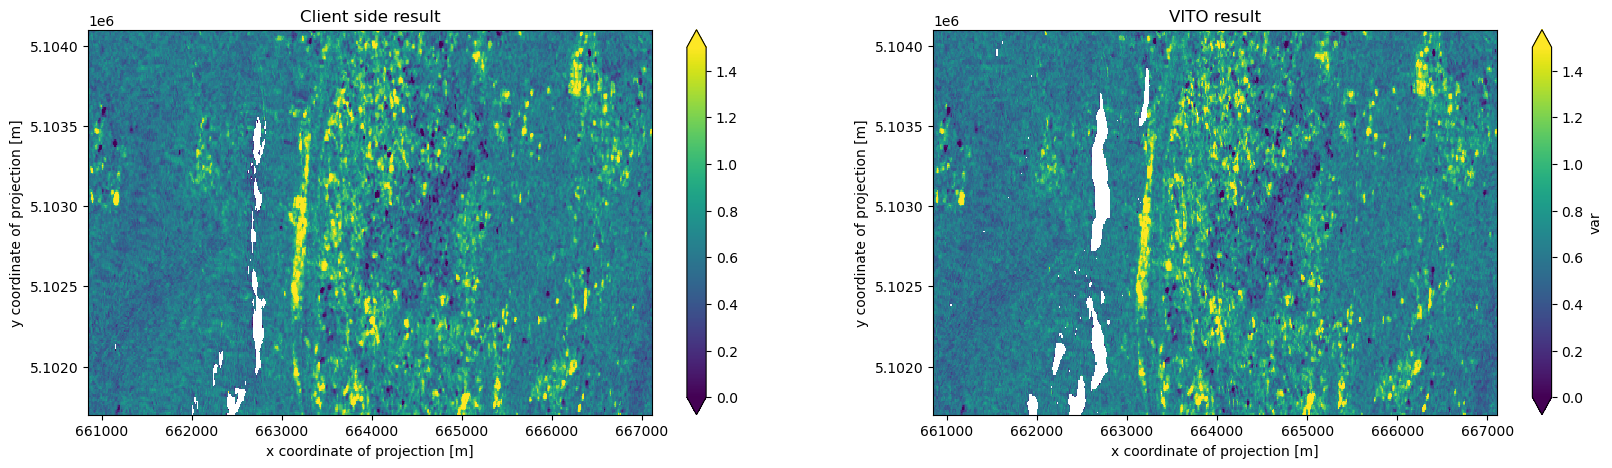

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(20,5))
ratio_openeo_client.plot.imshow(ax=ax[0],vmin=0,vmax=1.5)
ax[0].set_title('Client side result')
vito_result.plot.imshow(ax=ax[1],vmin=0,vmax=1.5)
ax[1].set_title('VITO result')
plt.show()

Compare the results between `openeo-processes-dask` and pure xArray

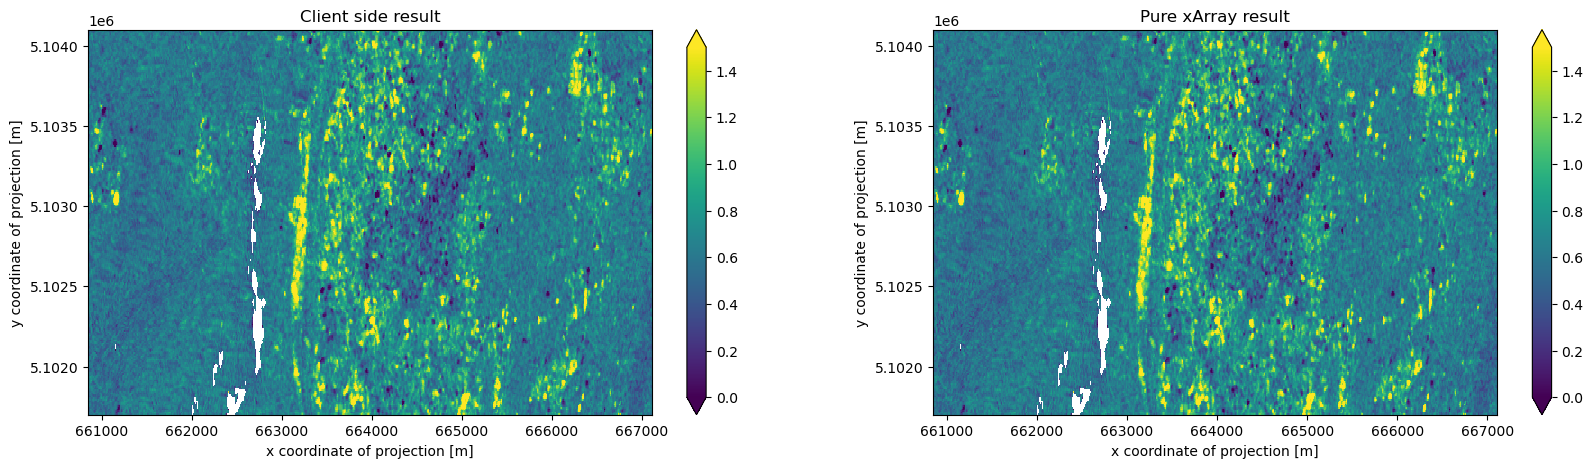

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(20,5))
ratio_openeo_client.plot.imshow(ax=ax[0],vmin=0,vmax=1.5)
ax[0].set_title('Client side result')
ratio_xr.plot.imshow(ax=ax[1],vmin=0,vmax=1.5)
ax[1].set_title('Pure xArray result')
plt.show()